In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url= "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df=pd.read_csv(url)

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
print(df.shape)
print(len(df))

(2035, 8)
2035


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.sort_values(by='Date',ignore_index=True,inplace=True) #Sorting Values w.r.t the dates
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [ ]:
df_close = df.reset_index()['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

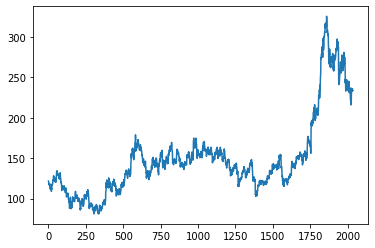

In [ ]:
df_close.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
df1 = scale.fit_transform(np.array(df_close).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
train_size = int(len(df1)*0.80)
test_size = len(df1)-train_size
train_data = df1[0:train_size,:]
test_data = df1[train_size:len(df1),:]


In [ ]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.24877451],
       [0.25245098],
       [0.24795752]])

In [ ]:
test_data

array([[0.26633987],
       [0.25714869],
       [0.25735294],
       [0.24918301],
       [0.24611928],
       [0.23611111],
       [0.24162582],
       [0.24183007],
       [0.24775327],
       [0.24775327],
       [0.24121732],
       [0.23815359],
       [0.23672386],
       [0.23325163],
       [0.2559232 ],
       [0.24571078],
       [0.25490196],
       [0.25449346],
       [0.25245098],
       [0.24693627],
       [0.24448529],
       [0.22937092],
       [0.23917484],
       [0.24489379],
       [0.26041667],
       [0.26082516],
       [0.26756536],
       [0.26531863],
       [0.25388072],
       [0.28860294],
       [0.28676471],
       [0.27634804],
       [0.28431373],
       [0.28451797],
       [0.28267974],
       [0.28431373],
       [0.28982843],
       [0.29289216],
       [0.29452614],
       [0.28451797],
       [0.28594771],
       [0.29595588],
       [0.28921569],
       [0.28410948],
       [0.27982026],
       [0.2745098 ],
       [0.28288399],
       [0.290

In [ ]:
time_step = 100
x_train,y_train = [],[]
for i in range(len(train_data)-time_step-1):
    a = train_data[i:(i+time_step),0]
    x_train.append(a)
    y_train.append(train_data[i+ time_step,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_test,y_test = [],[]
for i in range(len(test_data)-time_step-1):
    b = test_data[i:(i+time_step),0]
    x_test.append(b)
    y_test.append(test_data[i+time_step,0])
x_test,y_test = np.array(x_test),np.array(y_test)

In [ ]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100)
Y_train shape : (1527,)
X_test shape  : (306, 100)
Y_test shape  : (306,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test  = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100, 1)
Y_train shape : (1527,)
X_test shape  : (306, 100, 1)
Y_test shape  : (306,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout

In [ ]:
model = Sequential()
#Adding the 1st layer of stacked lstm model
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [28]:
model.fit(x=x_train,  y=y_train, batch_size=32, epochs=100,   validation_data=(x_test,y_test), verbose=1)

Epoch 1/100
48/48 [==============================] - 23s 288ms/step - loss: 0.0058 - val_loss: 0.0061
Epoch 2/100
48/48 [==============================] - 12s 255ms/step - loss: 0.0017 - val_loss: 0.0055
Epoch 3/100
48/48 [==============================] - 12s 254ms/step - loss: 0.0015 - val_loss: 0.0098
Epoch 4/100
48/48 [==============================] - 12s 254ms/step - loss: 0.0014 - val_loss: 0.0111
Epoch 5/100
48/48 [==============================] - 12s 249ms/step - loss: 0.0013 - val_loss: 0.0126
Epoch 6/100
48/48 [==============================] - 12s 251ms/step - loss: 0.0012 - val_loss: 0.0167
Epoch 7/100
48/48 [==============================] - 12s 252ms/step - loss: 0.0011 - val_loss: 0.0137
Epoch 8/100
48/48 [==============================] - 12s 243ms/step - loss: 0.0011 - val_loss: 0.0114
Epoch 9/100
48/48 [==============================] - 12s 250ms/step - loss: 0.0010 - val_loss: 0.0200
Epoch 10/100
48/48 [==============================] - 12s 255ms/step - loss: 0.001

In [29]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

10/10 [==============================] - 1s 64ms/step


In [30]:
train_pred = scale.inverse_transform(train_pred)
test_pred = scale.inverse_transform(test_pred)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_train,train_pred))

132.7739468596033

In [32]:
sqrt(mean_squared_error(y_test, test_pred))

239.24393665096454

In [33]:
lookback = 100
train_pred_plot = np.empty_like(df1)
train_pred_plot[:,:] = np.nan
train_pred_plot[lookback: len(train_pred)+lookback, :] = train_pred

test_pred_plot = np.empty_like(df1)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_pred)+(lookback*2)+1: len(df1)-1, : ] = test_pred

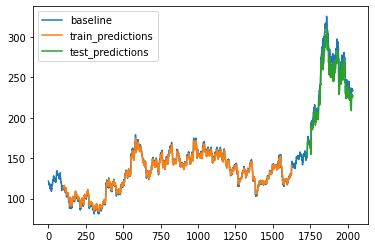

In [34]:
plt.plot(scale.inverse_transform(df1),label='baseline')
plt.plot(train_pred_plot,label='train_predictions')
plt.plot(test_pred_plot,label= 'test_predictions')
plt.legend()
plt.show()

In [35]:
len(test_data)

407

In [36]:
x_input = test_data[307:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [38]:
output=[]
n_steps=100
i=0
while(i<21):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)

[0.5900985]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

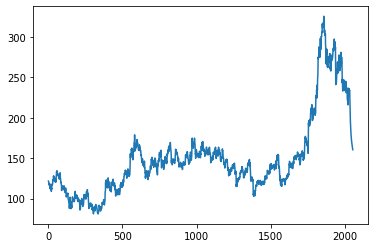

In [39]:
df = df1.tolist()
df.extend(output)
df=scale.inverse_transform(df).tolist()
plt.plot(df)